explanation: https://chat.openai.com/share/131e0c96-6c8c-4229-a739-f3c9a254a856

to generate more scattered and complex data. This can be achieved by adjusting the mean and standard deviation values to introduce more overlap between classes. 

```py
class_properties = {
    0: {'mean': [2, 3], 'std': [1.5, 1.5]},
    1: {'mean': [5, 6], 'std': [2, 2]},
    2: {'mean': [8, 9], 'std': [1.5, 1.5]}
}
```

explanation how important training and testing model

https://chat.openai.com/share/192be8a4-ceee-46dc-aabb-b59178db6f8c

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Define classes and their properties
class_list = ["Class A", "Class B", "Class C"]
class_properties = {
    0: {'mean': [2, 3], 'std': [1, 0.5]},
    1: {'mean': [7, 6], 'std': [0.5, 1]},
    2: {'mean': [4, 9], 'std': [0.8, 0.5]}
}

# Generate synthetic data for a classification task
num_samples_per_class = 300
num_features = 2
num_classes = len(class_list)

data = []
for class_id in class_properties.keys():
    mean = class_properties[class_id]['mean']
    std = class_properties[class_id]['std']
    samples = np.random.normal(mean, std, size=(num_samples_per_class, num_features))
    labels = np.full((num_samples_per_class, 1), class_id)
    class_data = np.hstack((samples, labels))
    data.append(class_data)

# Combine data from all classes
data = np.vstack(data)
np.random.shuffle(data)

# Create a DataFrame
columns = [f'feature_{i+1}' for i in range(num_features)] + ['class']
df = pd.DataFrame(data, columns=columns)

# Split data into features and labels
X = df.iloc[:, :-1]
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save the trained model to a file using joblib
model_filename = "decision_tree_model.joblib"
joblib.dump(clf, model_filename)

# Load the saved model
loaded_model = joblib.load(model_filename)

# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot actual and predicted data points
plt.figure(figsize=(12, 6))

# Plot actual data points
plt.subplot(1, 2, 1)
sns.scatterplot(x='feature_1', y='feature_2', hue='class', data=df, palette='viridis')
plt.title('Actual Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot predicted data points
plt.subplot(1, 2, 2)
sns.scatterplot(x='feature_1', y='feature_2', hue='class', data=df, palette='viridis', alpha=0.5)
sns.scatterplot(x=X_test['feature_1'], y=X_test['feature_2'], hue=y_pred, marker='X', s=100, palette='Set2', edgecolor='black')
plt.title('Actual vs Predicted Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


With meaningful names


Accuracy: 0.9944444444444445

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        63
         1.0       1.00      0.98      0.99        50
         2.0       0.99      1.00      0.99        67

    accuracy                           0.99       180
   macro avg       1.00      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

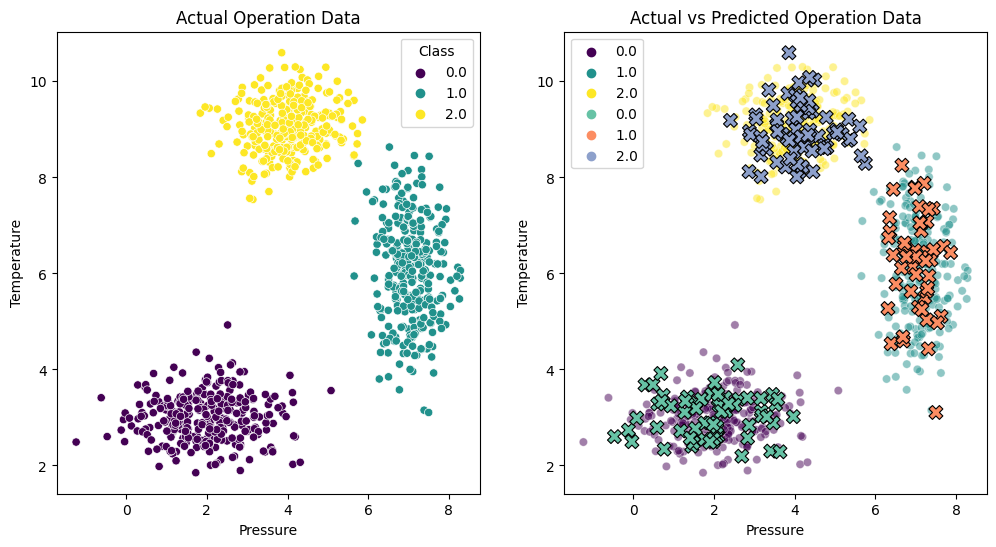

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Define classes and their properties with more meaningful names
class_list = ["Normal", "Faulty", "Outlier"]
class_properties = {
    0: {'mean': [2, 3], 'std': [1, 0.5]},
    1: {'mean': [7, 6], 'std': [0.5, 1]},
    2: {'mean': [4, 9], 'std': [0.8, 0.5]}
}

# Generate synthetic data for a classification task
num_samples_per_class = 300
num_features = 2
num_classes = len(class_list)

data = []
for class_id in class_properties.keys():
    mean = class_properties[class_id]['mean']
    std = class_properties[class_id]['std']
    samples = np.random.normal(mean, std, size=(num_samples_per_class, num_features))
    labels = np.full((num_samples_per_class, 1), class_id)
    class_data = np.hstack((samples, labels))
    data.append(class_data)

# Combine data from all classes
data = np.vstack(data)
np.random.shuffle(data)

# Create a DataFrame with more meaningful column names
columns = [f'Feature_{i+1}' for i in range(num_features)] + ['Class']
df = pd.DataFrame(data, columns=columns)

# Split data into features and labels
X = df.iloc[:, :-1]
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save the trained model to a file using joblib
model_filename = "fault_detection_model.joblib"
joblib.dump(clf, model_filename)

# Load the saved model
loaded_model = joblib.load(model_filename)

# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot actual and predicted data points with more meaningful plot titles
plt.figure(figsize=(12, 6))

# Plot actual data points
plt.subplot(1, 2, 1)
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Class', data=df, palette='viridis')
plt.title('Actual Operation Data')
plt.xlabel('Pressure')
plt.ylabel('Temperature')

# Plot predicted data points
plt.subplot(1, 2, 2)
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Class', data=df, palette='viridis', alpha=0.5)
sns.scatterplot(x=X_test['Feature_1'], y=X_test['Feature_2'], hue=y_pred, marker='X', s=100, palette='Set2', edgecolor='black')
plt.title('Actual vs Predicted Operation Data')
plt.xlabel('Pressure')
plt.ylabel('Temperature')

plt.show()

